In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
for col in df.columns: 
    print(col)

Unnamed: 0
ID
Name
Age
Photo
Nationality
Flag
Overall
Potential
Club
Club Logo
Value
Wage
Special
Preferred Foot
International Reputation
Weak Foot
Skill Moves
Work Rate
Body Type
Real Face
Position
Jersey Number
Joined
Loaned From
Contract Valid Until
Height
Weight
LS
ST
RS
LW
LF
CF
RF
RW
LAM
CAM
RAM
LM
LCM
CM
RCM
RM
LWB
LDM
CDM
RDM
RWB
LB
LCB
CB
RCB
RB
Crossing
Finishing
HeadingAccuracy
ShortPassing
Volleys
Dribbling
Curve
FKAccuracy
LongPassing
BallControl
Acceleration
SprintSpeed
Agility
Reactions
Balance
ShotPower
Jumping
Stamina
Strength
LongShots
Aggression
Interceptions
Positioning
Vision
Penalties
Composure
Marking
StandingTackle
SlidingTackle
GKDiving
GKHandling
GKKicking
GKPositioning
GKReflexes
Release Clause


In [5]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo', 'ID'],axis=1,inplace=True)

In [6]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [8]:
draw_missing_data_table(df)

,Total,Percent
Loaned From,16943,0.930576
CDM,2085,0.114516
LM,2085,0.114516
CB,2085,0.114516
LCB,2085,0.114516
...,...,...
Special,0,0.000000
Potential,0,0.000000
Value,0,0.000000
Wage,0,0.000000


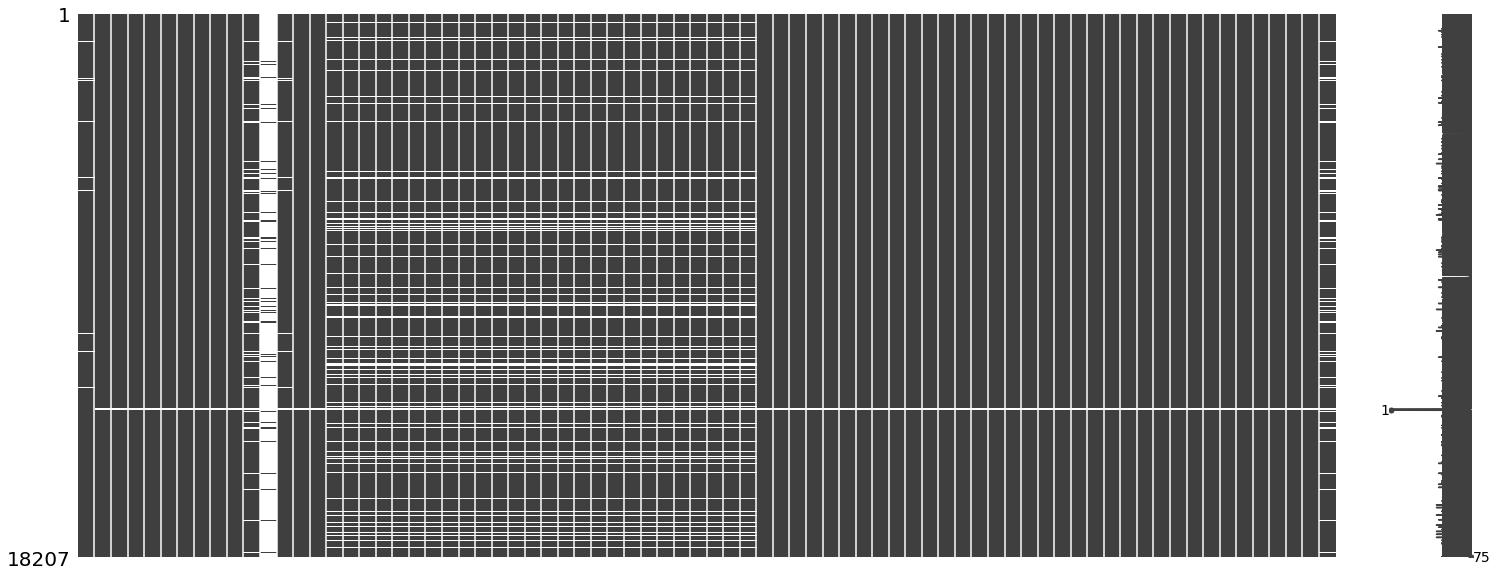

In [12]:
missingdata_df = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingdata_df])

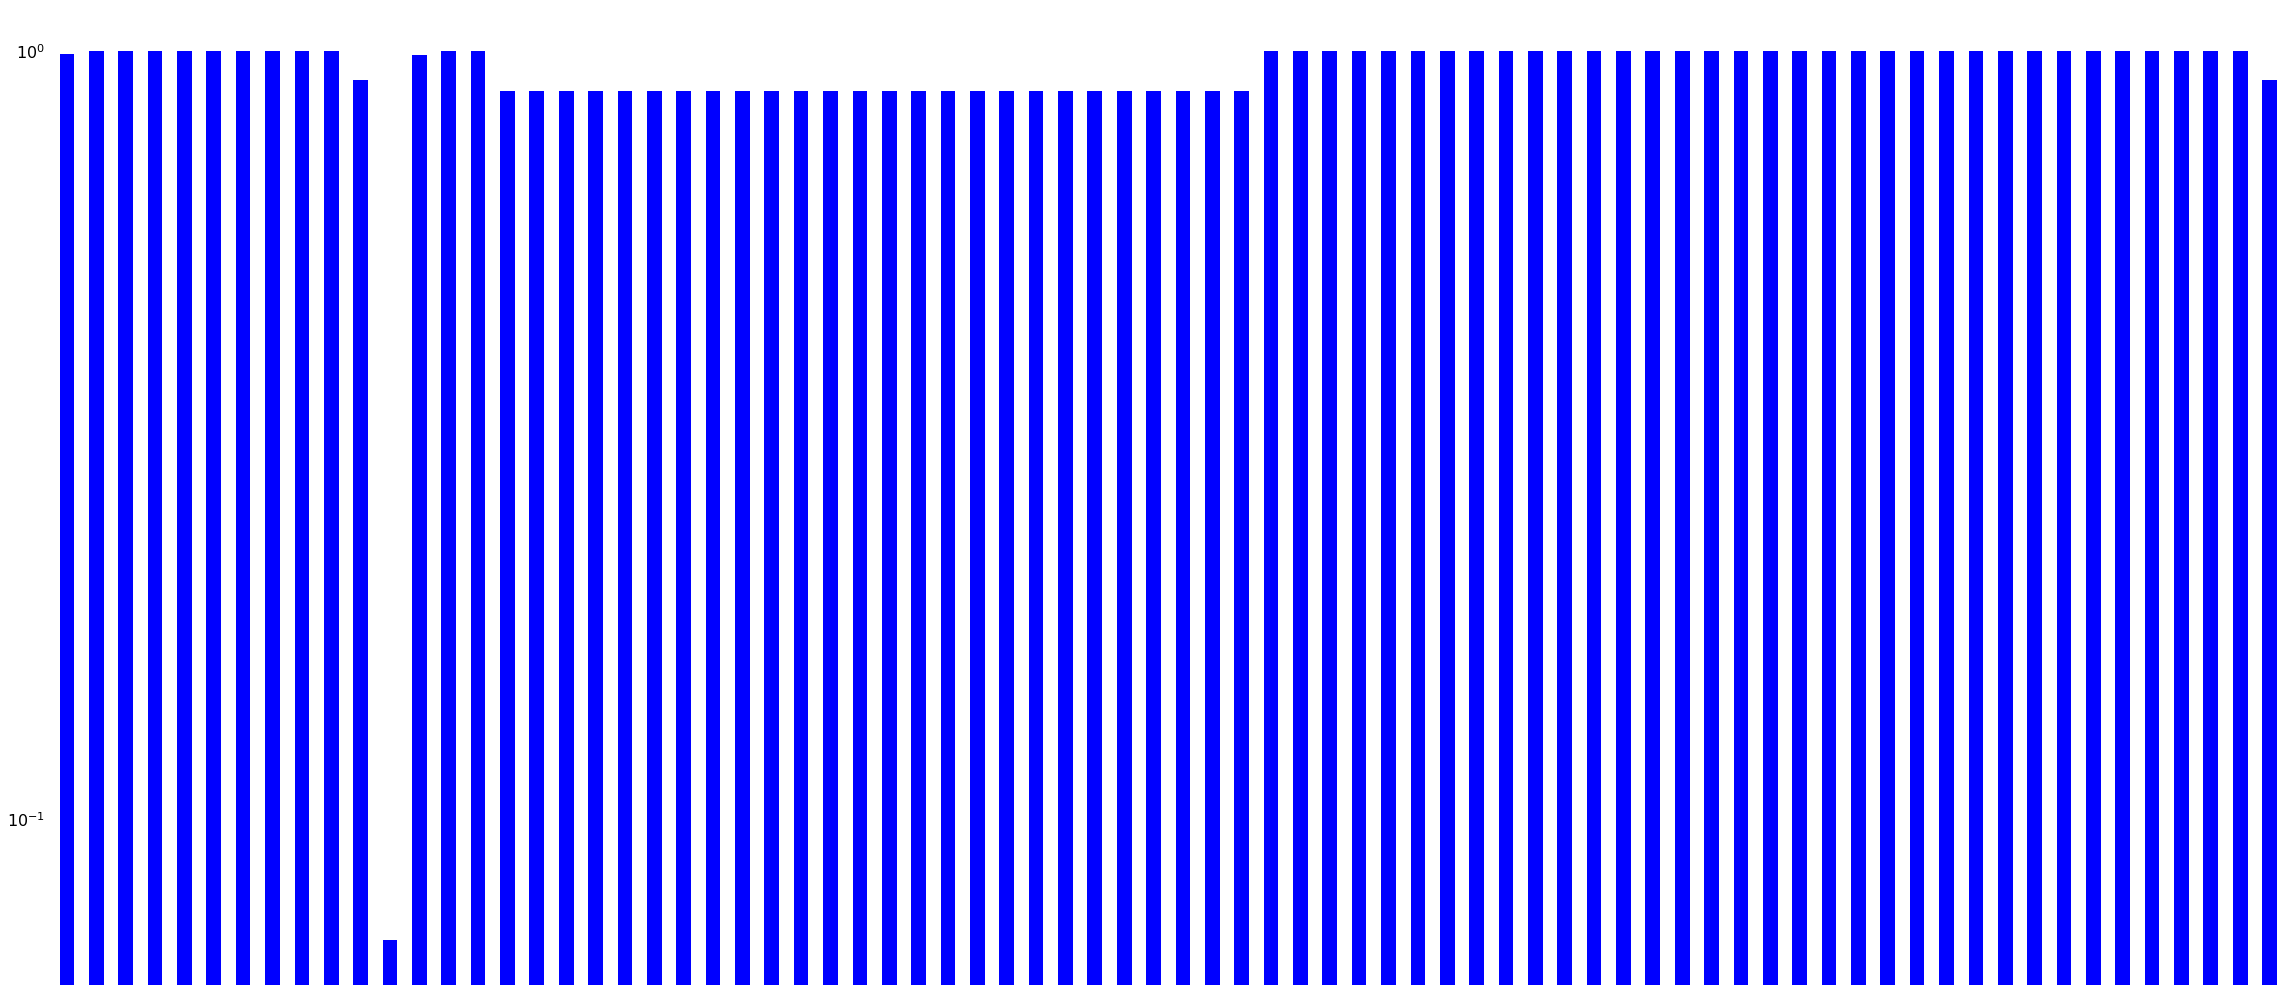

In [17]:
msno.bar(df[missingdata_df], color="blue", log=True, figsize=(40,18))

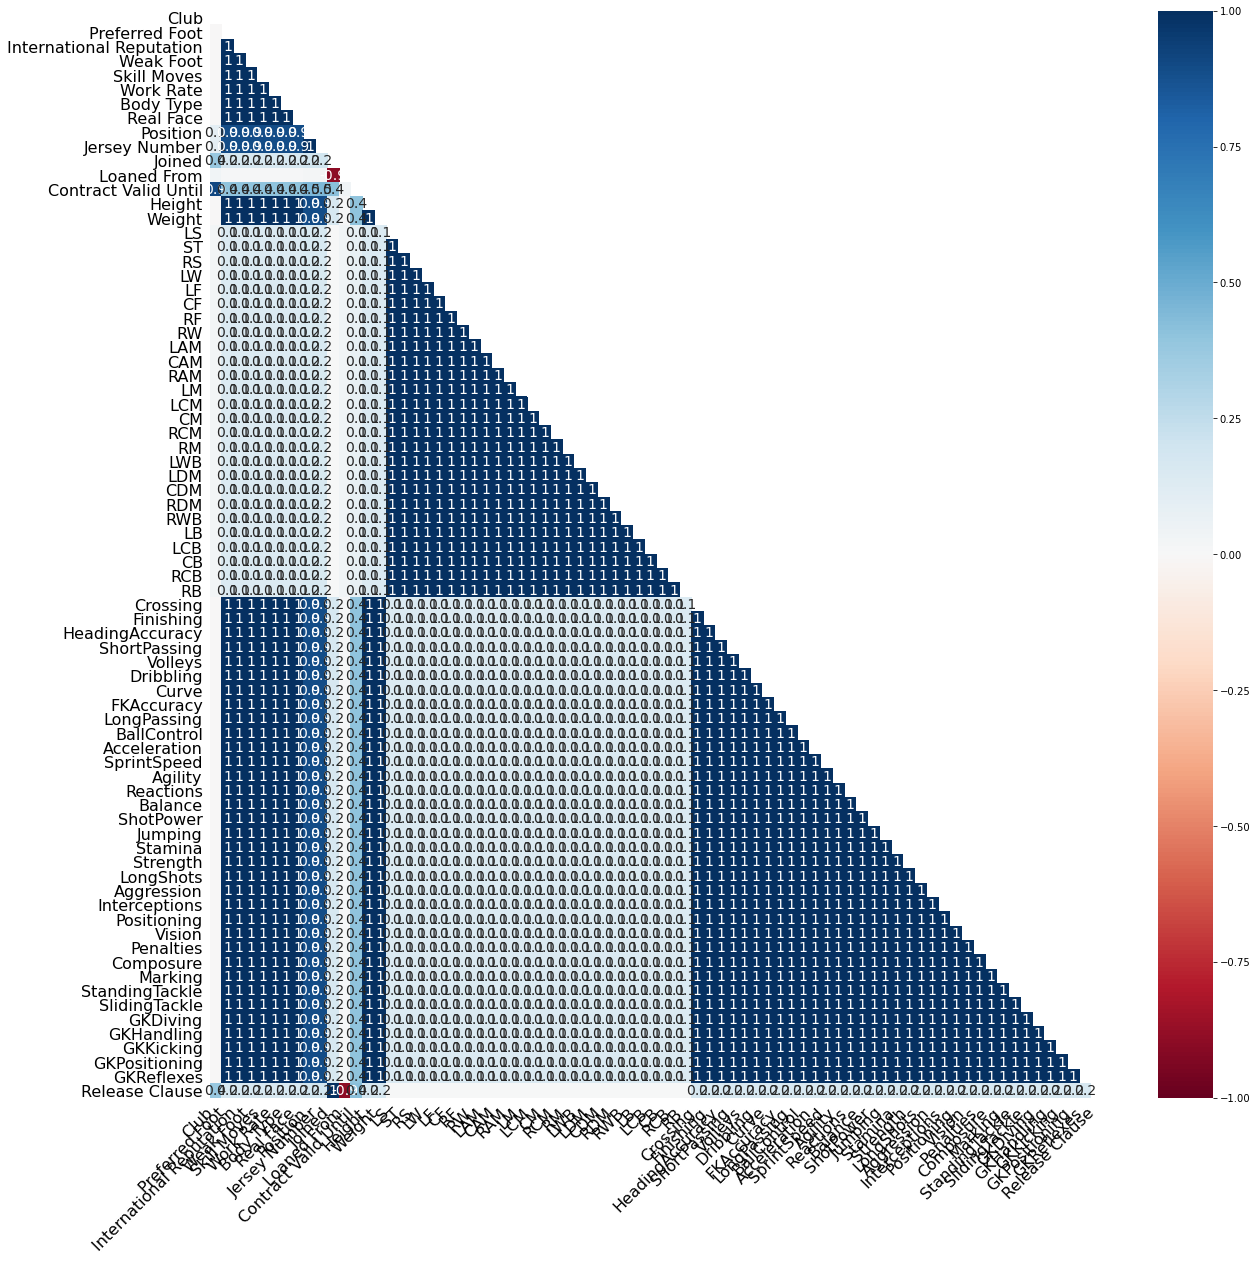

In [18]:
msno.heatmap(df[missingdata_df], figsize=(20,20))

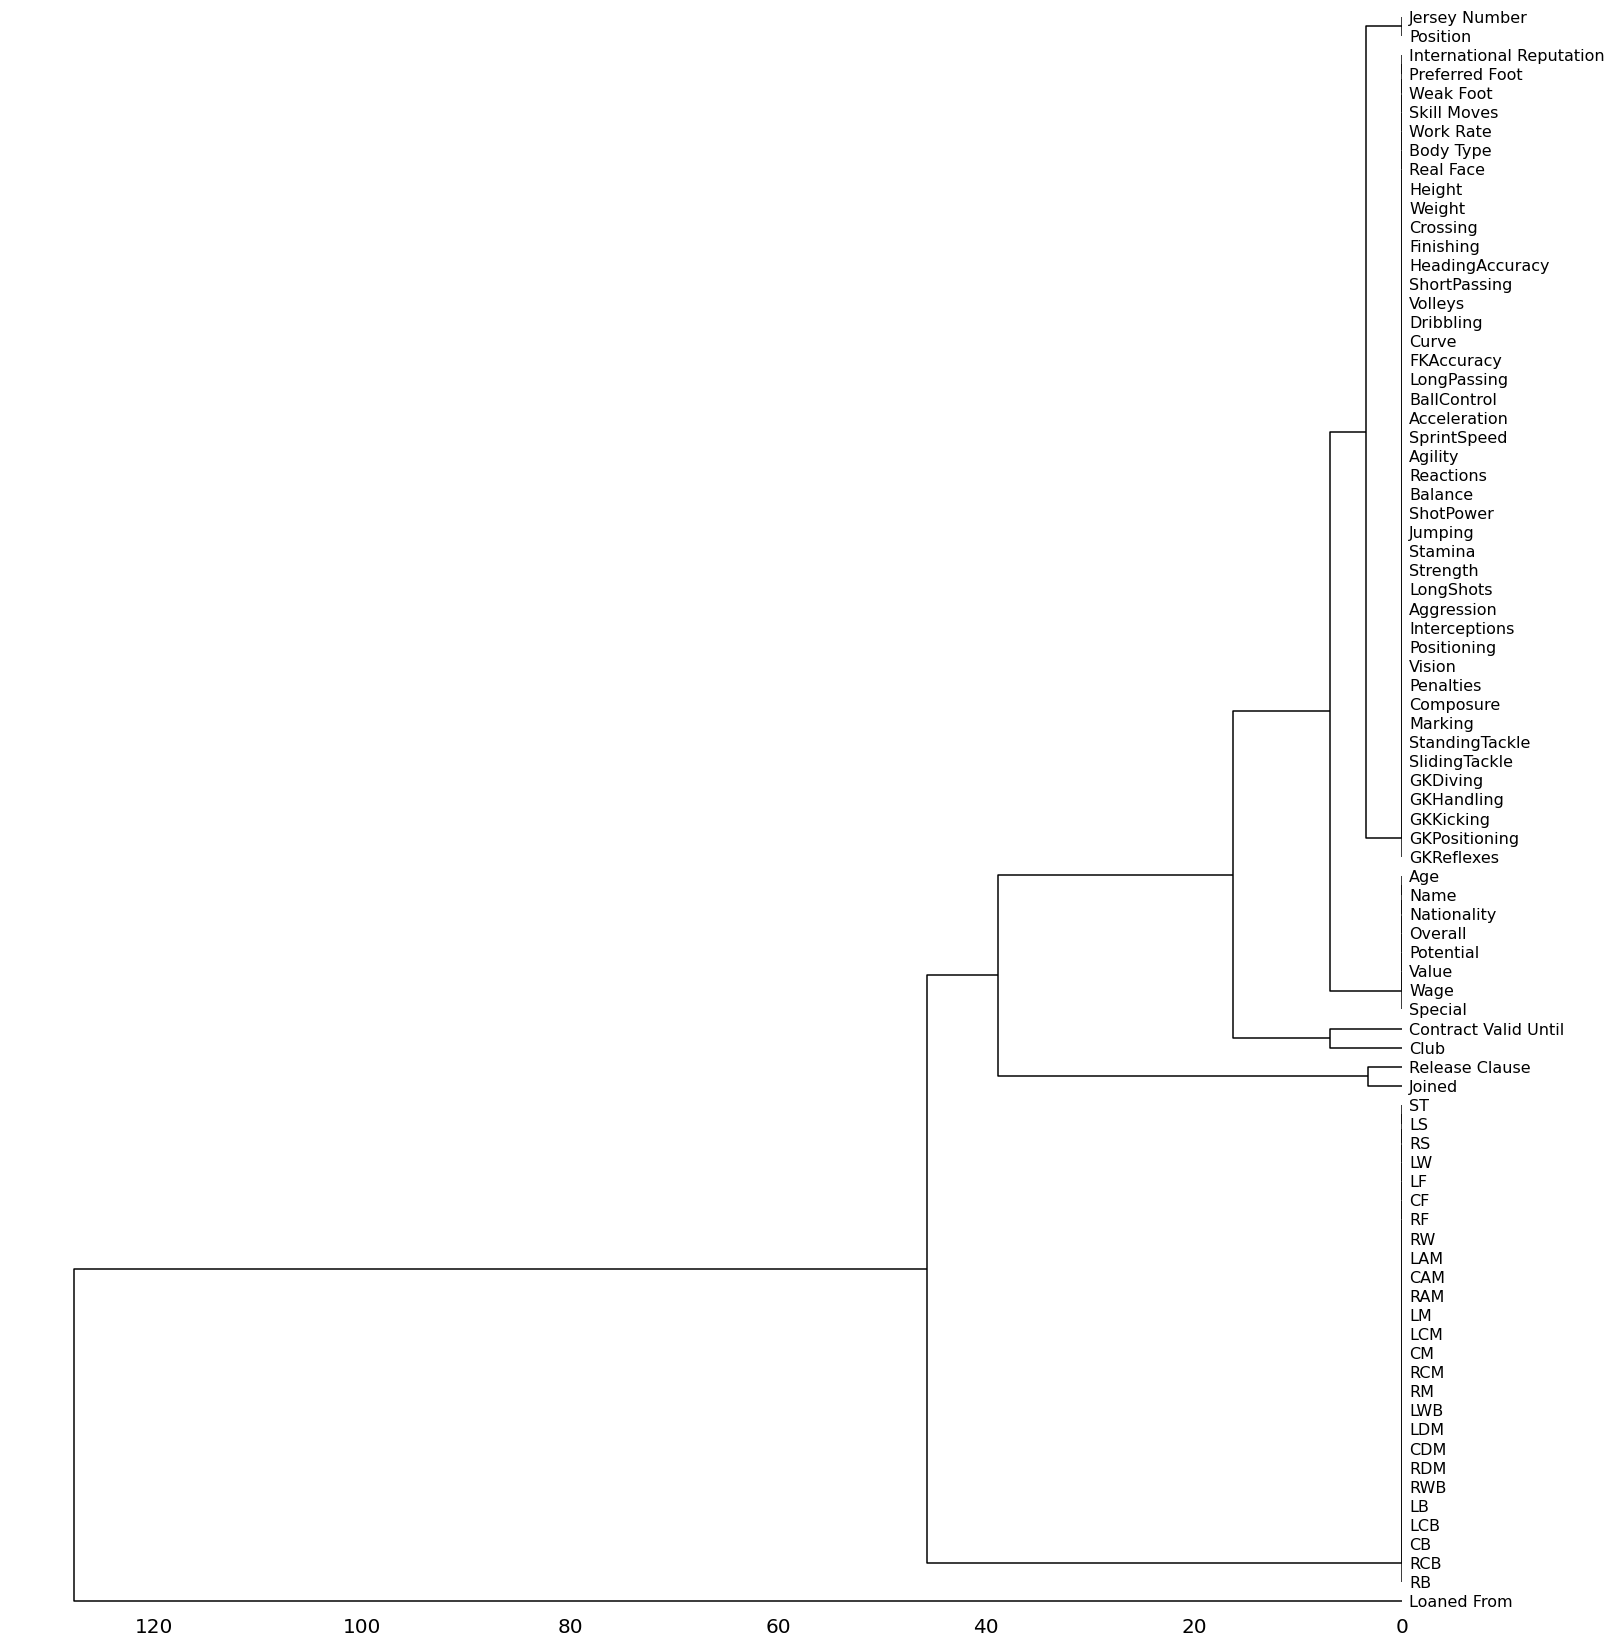

In [19]:
msno.dendrogram(df)